In [ ]:
// A macro to plot a spectrogram(?) of the power (Y) vs Frq bin (X) over a series of events

In [1]:
gROOT->ProcessLine(".L /home/rj/app/lib/libRadioScatter.so");
gROOT->ProcessLine("#include </home/rj/app/include/RadioScatter/RadioScatter.hh>");
gROOT->ProcessLine("#include </home/rj/app/include/RadioScatter/RSEventSummary.hh>");
gROOT->ProcessLine("#include </home/rj/app/include/RadioScatter/RadioScatterEvent.hh>");
gROOT->ProcessLine("#include </home/rj/app/include/RadioScatter/TUtilRadioScatter.hh>");
TString infile = "/home/rj/RadioScatter/doc/smallmultiscat_0MHz_10W_10ns.root";
auto ff=TFile::Open(infile, "READ");
TFile *outfile = new TFile("/home/rj/RadioScatter/outputfiles/voltage_time_angle.root", "RECREATE");
TTree *outtree = new TTree("tree", "test label");

int rxindex = 0;
int txindex = 0;
int antenna = 0;
int entry = 0;
auto tree=(TTree*)ff->Get("tree");


In [2]:
auto event= new RadioScatterEvent();
tree->SetBranchAddress("event", &event);
tree->GetEntry(29);
// tree->GetEntries();
// cout << event->nrx;
auto c1 = TUtilRadioScatter::canvas();

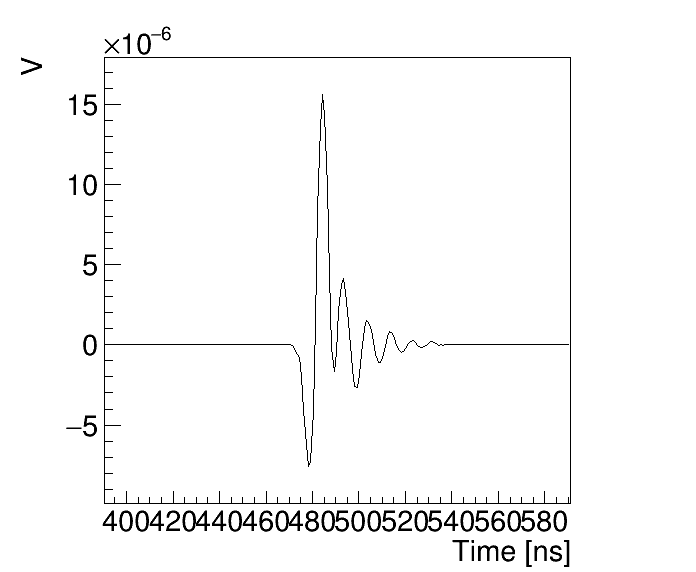

199
64


In [3]:
c1->Clear();
auto evG=event->getGraph(rxindex, txindex);
TUtilRadioScatter::titles(evG, "", "Time [ns]", "V");
TUtilRadioScatter::style(evG, kBlack, 1, 1);
TUtilRadioScatter::xrange(evG, evG->GetX()[0], evG->GetX()[evG->GetN()-1]);
int bins = 32, overlap = 31;
auto spec=TUtilRadioScatter::FFT::spectrogram(evG, bins, overlap, bins*2, 2,   0,     0,    .2);

int NumFreqBins=spec->GetNbinsX();
int NumIntensBins=spec->GetNbinsY();
cout << NumFreqBins << endl;
cout << NumIntensBins << endl;
double *points = new double[NumFreqBins];
double *itt = new double[NumIntensBins];

vector<double> x,y;

for(int i = 0; i < spec->GetNbinsX(); ++i){
        for(int j = 0; j < spec->GetNbinsY(); ++j){
                // "Y-axis" of spectrogram becomes X-axis of scatter plot
//                 x.push_back(spec->GetYaxis()->GetBinCenter(j)); // Freq
                    x.push_back(j);
//                 cout << "x: " << spec->GetYaxis()->GetBinCenter(j) << endl   ;
                // "Z-axis" of spectrogram becomes Y-axis of scatter plot
                y.push_back(spec->GetBinContent(i, j)); // Power
                if(spec->GetBinContent(i, j) != 0){
//                 cout << "y:(" <<i<<","<<j<<")" << spec->GetBinContent(i, j) << endl;
        }
        }
}
// for(int i = 0; i < spec->GetNbinsX(); ++i){
//         for(int j = 0; j < spec->GetNbinsY(); ++j){
//         cout << "x: " << x[i] << 
//         }
// }

// TGraph *gr = new TGraph(x.size(), &x[0], &y[0]);
// gr->Draw("AP");

Float_t xmax = 1;
Float_t xmin = 0;
// spec->ProfileY()->Draw();
evG->Draw();
// spec->Draw("colz");
c1->Draw();


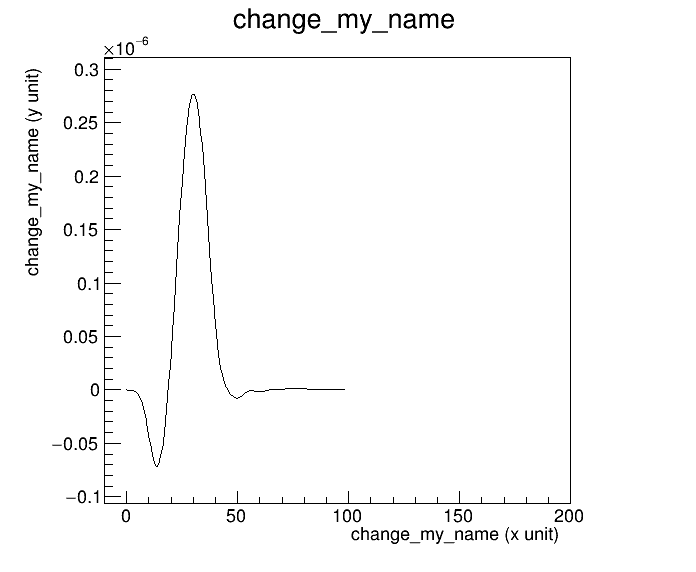

Info in <TCanvas::Print>: png file /home/rj/new/change_my_name.png has been created


In [14]:
//run after the graph populator below
//for comparison to the above graph to verify that they aren't the same (hopefully)
TGraph *gr = new TGraph(counter,itteration,powers);
    gr->SetMarkerColor(4);
    gr->SetMarkerSize(.3);
    gr->SetMarkerStyle(20);
    gr->SetTitle("change_my_name");
    gr->GetXaxis()->SetTitle("change_my_name (x unit)");
    gr->GetYaxis()->SetTitle("change_my_name (y unit)");
    gr->GetYaxis()->SetLimits(-0.10*std::pow(10,-6),.3*std::pow(10,-6)); //constrains the y axis by values*10^-6
    gr->GetXaxis()->SetLimits(-10,200); 

    gr->Draw("ac"); //axis, points, curve
//     c1->Update();
//     c1->GetFrame()->SetBorderSize(100);
//     c1->Modified();
    c1->Draw();
//    c1->SaveAs("/home/rj/new/change_my_name.png");

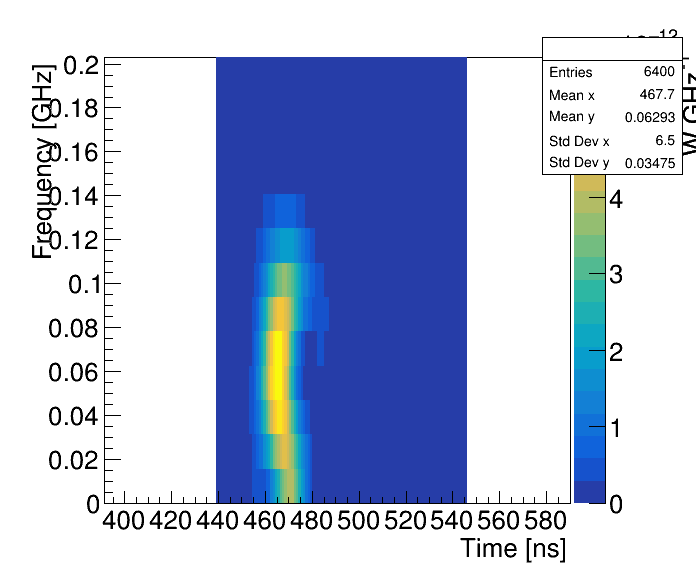

In [15]:
spec->Draw("colz");
c1->Draw();

In [ ]:

float **frqs = new float*[NumFreqBins];
for(int i = 0; i < NumFreqBins; ++i){
    frqs[i] = new float[event->nrx];
}
//make a 2d array of size (entries, rxs)
float **pows = new float*[NumIntensBins];
for(int i = 0; i < NumIntensBins; ++i){
    pows[i] = new float[event->nrx];
}


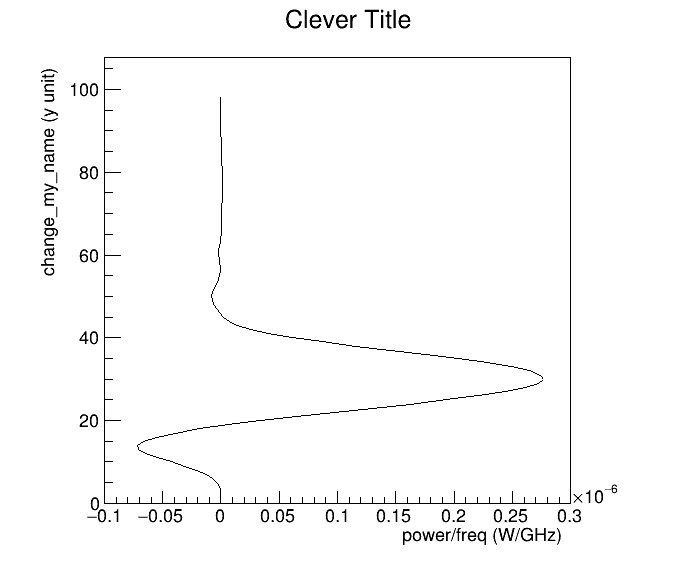

yep1
330
powers[0]: -1.46393e-11
powers[1]: -8.10434e-11
powers[2]: -2.6065e-10
powers[3]: -6.77891e-10
powers[4]: -1.60783e-09
powers[5]: -3.51008e-09
powers[6]: -6.97335e-09
powers[7]: -1.25781e-08
powers[8]: -2.066e-08
powers[9]: -3.10441e-08
powers[10]: -4.28595e-08
powers[11]: -5.45935e-08
powers[12]: -6.43929e-08
powers[13]: -7.04432e-08
powers[14]: -7.13518e-08
powers[15]: -6.64019e-08
powers[16]: -5.55839e-08
powers[17]: -3.94022e-08
powers[18]: -1.85792e-08
powers[19]: 6.16453e-09
powers[20]: 3.41606e-08
powers[21]: 6.47125e-08
powers[22]: 9.70002e-08
powers[23]: 1.30005e-07
powers[24]: 1.62524e-07
powers[25]: 1.93231e-07
powers[26]: 2.2075e-07
powers[27]: 2.4377e-07
powers[28]: 2.61191e-07
powers[29]: 2.72232e-07
powers[30]: 2.76489e-07
powers[31]: 2.73922e-07
powers[32]: 2.64782e-07
powers[33]: 2.49572e-07
powers[34]: 2.28992e-07
powers[35]: 2.03945e-07
powers[36]: 1.75602e-07
powers[37]: 1.4544e-07
powers[38]: 1.15189e-07
powers[39]: 8.66823e-08
powers[40]: 6.15867e-08
powe

Info in <TCanvas::Print>: png file /home/rj/new/change_my_name.png has been created


In [17]:
//graph populator
cout << "yep1" << endl;
Float_t *powers = new Float_t[x.size()];
Float_t *itteration = new Float_t[y.size()];
cout << event->nrx << tree->GetEntries() << endl;
int counter = 0;
for(int i = 0; i < 200; ++i){ //loops over number of frq bins
    for(int j = 0; j <= 64; ++j){ //loops over number of intensity bins
        //TODO: auto populate number of bins from variable, not user
        if(abs(spec->GetBinContent(i,j)) > (1 * std::pow(10,-11.23))){
//                cout << "bin\(" << i << ", " << j <<  ") contents: " << spec->GetBinContent(i,j) << endl;
            powers[counter] = spec->GetBinContent(i,j); //fills powers array with intensity of each bin
            cout << "powers[" << counter << "]: " << powers[counter] << endl;
            itteration[counter] = counter; //fills array for y axis of graph
            counter++; //counts the loop number
}}}

TGraph *gr = new TGraph(counter,powers,itteration);
gr->SetMarkerColor(4);
gr->SetMarkerSize(.3);
gr->SetMarkerStyle(20);
gr->SetTitle("Clever Title");
gr->GetXaxis()->SetTitle("power/freq (W/GHz)");
gr->GetYaxis()->SetTitle("change_my_name (y unit)");
gr->GetXaxis()->SetLimits(-0.10*std::pow(10,-6),.3*std::pow(10,-6)); //constrains the x axis by values*10^-6
gr->Draw("ac"); //axis, points, curve
//     c1->Update();
//     c1->GetFrame()->SetBorderSize(100);
//     c1->Modified();
c1->Draw();
c1->SaveAs("/home/rj/new/change_my_name.png");

In [ ]:
TGraph *gr = new TGraph(counter,powers,itteration);
    gr->SetMarkerColor(4);
    gr->SetMarkerSize(.5);
    gr->SetMarkerStyle(20);
    gr->SetTitle("change_my_name");
    gr->GetXaxis()->SetTitle("change_my_name (x unit)");
    gr->GetYaxis()->SetTitle("change_my_name (y unit)");
    gr->GetXaxis()->SetLimits(-0.15*std::pow(10,-6),.3*std::pow(10,-6));
    gr->Draw("AP");
//     c1->Update();
//     c1->GetFrame()->SetBorderSize(100);
//     c1->Modified();
    c1->Draw();
   c1->SaveAs("/home/rj/new/change_my_name.png");


In [ ]:
//graph populator
cout << "yep1" << endl;
Float_t *powers = new Float_t[x.size()];
Float_t *itteration = new Float_t[y.size()];
cout << event->nrx << tree->GetEntries() << endl;
int counter = 0;
for(int i = 0; i < 200; ++i){ //loops over number of frq bins
    for(int j = 0; j <= 64; ++j){ //loops over number of intensity bins
        //TODO: auto populate number of bins from variable, not user
//         if(abs(spec->GetBinContent(i,j)) > (1 * std::pow(10,-11.23))){
//                cout << "bin\(" << i << ", " << j <<  ") contents: " << spec->GetBinContent(i,j) << endl;
            powers[counter] = spec->GetBinContent(i,j); //fills powers array with intensity of each bin
            cout << "powers[" << counter << "]: " << powers[counter] << endl;
            itteration[counter] = counter; //fills array for y axis of graph
            counter++; //counts the loop number
}}

TGraph *gr = new TGraph(counter,powers,itteration);
gr->SetMarkerColor(4);
gr->SetMarkerSize(.3);
gr->SetMarkerStyle(20);
gr->SetTitle("Clever Title");
gr->GetXaxis()->SetTitle("power/freq (W/GHz)");
gr->GetYaxis()->SetTitle("change_my_name (y unit)");
gr->GetXaxis()->SetLimits(-0.10*std::pow(10,-6),.3*std::pow(10,-6)); //constrains the x axis by values*10^-6
gr->Draw("ac"); //axis, points, curve
//     c1->Update();
//     c1->GetFrame()->SetBorderSize(100);
//     c1->Modified();
c1->Draw();
c1->SaveAs("/home/rj/new/change_my_name.png");

In [ ]:
int entries = tree->GetEntries();
int rxs = event->nrx;
float **power_array = new float*[entries];
for(int i = 0; i < entries; ++i){
    power_array[i] = new float[rxs];
}
float **freq_array = new float*[entries];
for(int i = 0; i < entries; ++i){
    freq_array[i] = new float[rxs];
}
auto *freqs = new double[30][3];
auto *pows = new double[30][3];
double frq;
double pow;
double thresh = 20e-6; 
cout << "Trigger threshold is: " << thresh << "\n" << endl;
for(int k = 0; k < tree->GetEntries(); k++){
    tree->GetEntry(k); 
    int trig=0,num=0;
    for(int i=0;i<event->ntx;i++){
        for(int j=0;j<event->nrx;j++){
            trig=event->peakV(i,j)>=thresh?1:0;
            if(trig==1){
                num++;
                // Meat goes here
                frq = event->peakFreq(0,j);
                pow = event->peakPowerW(0,j);
                freq_array[k][j]=frq;
                power_array[k][j]=pow;
            }
            else{
                freq_array[k][j] = 0;
            }
            if(num>=event->nrx){
                
            }
        }
    }
}
double *allfreqs = new double[90];
double *allpows = new double[90];
int count = 0;
for(int entry = 0; entry < tree->GetEntries()-1; entry++){
    for(int rx = 0; rx < event->nrx; rx++){
//         cout << "event " << entry << " freq: " << freq_array[entry][rx] << "MHz, power: " << power_array[entry][rx] << endl;
        allfreqs[count] = freq_array[entry][rx];
        allpows[count]= power_array[entry][rx];
        count++;
    }
}

In [ ]:
c1->SetLogy(1);
const Int_t n = 90;
TGraph *gr = new TGraph(n,allfreqs,allpows);
gr->SetMarkerColor(4);
// gr->SetMarkerStyle(2);
gr->SetMarkerStyle(20);
gr->SetTitle("Triggered Event Peak Frequency vs Peak Power");
gr->GetXaxis()->SetTitle("Peak Frequency (MHz)");
gr->GetYaxis()->SetTitle("Peak Power (W)");
gr->Draw("AP");
c1->Update();
c1->GetFrame()->SetBorderSize(100);
c1->Modified();
c1->Draw();

In [ ]:
const Int_t n = 100;
auto spectrum=event->getSpectrum(rxindex, txindex);
double NumFreqBins=spectrum->GetNbinsX();
double NumIntensBins=spectrum->GetNbinsY();

double tempstuff;
      cout << "FBins: " << NumFreqBins << " IBins: " << NumIntensBins << endl;

for(int i = 1; i < NumFreqBins+1; ++i){
//   for(int j = 0; j < NumIntensBins; ++j){
//       tempstuff = spectrum->GetBinContent(j,i);
//       cout << tempstuff << endl;
      cout << "bin: " << i <<  " contents: " << spectrum->GetBinContent(i) << endl;
//         cout << spectrum->GetBinContent(j,i) << endl;
        
    // Fill e.g. a TGraph with (freq of freq bin #i, GetBinContent(j,i)
//   }
}
// TGraph *graph=new TGraph(n,NumFreqBins,NumIntensBins);


spectrum->Draw();
c1->Draw();
